Williamson-Hall Analysis - Will analyse data from 12 peaks and output a Williamson-Hall Plot.

Uses Gaussian curve fitting.

First box will import data from a .dat file for values of q and intensity.

In [284]:
# Williamson-Hall Analysis - Part 1 - Import Data

import os
import math
import random
import pandas as pd
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, signal
from scipy.optimize import curve_fit



# First import the data to be analysed
data_analyse = np.loadtxt('122295_1286.dat')

#Room temperature

xdataanalyse = data_analyse[:,0]
ydataanalyse = data_analyse[:,1]




Now, you can enter the expected values for q and the location of the 12 peaks - these are determined from the miller indices and
the paramters of the diffraction (wavelength, energy etc.)

All point from the 12 peaks will be output in scatter graphs - can revise the location of the peaks if not happy with the data.

In [285]:
# Williamson-Hall Analysis - Part 2 - Generating Useful Datasets

#import lmfit
#from lmfit.models import GaussianModel, VoigtModel


first_peak_min = input("Enter mininmum value for q of 1st peak: ")
first_peak_min = float(first_peak_min)
first_peak_max = input("Enter maximum value for q of 1st peak: ")
first_peak_max = float(first_peak_max)

second_peak_min = input("Enter mininmum value for q of 2nd peak: ")
second_peak_min = float(second_peak_min)
second_peak_max = input("Enter maximum value for q of 2nd peak: ")
second_peak_max = float(second_peak_max)

third_peak_min = input("Enter mininmum value for q of 3rd peak: ")
third_peak_min = float(third_peak_min)
third_peak_max = input("Enter maximum value for q of 3rd peak: ")
third_peak_max = float(third_peak_max)

fourth_peak_min = input("Enter mininmum value for q of 4th peak: ")
fourth_peak_min = float(fourth_peak_min)
fourth_peak_max = input("Enter maximum value for q of 4th peak: ")
fourth_peak_max = float(fourth_peak_max)

fifth_peak_min = input("Enter mininmum value for q of 5th peak: ")
fifth_peak_min = float(fifth_peak_min)
fifth_peak_max = input("Enter maximum value for q of 5th peak: ")
fifth_peak_max = float(fifth_peak_max)

sixth_peak_min = input("Enter mininmum value for q of 6th peak: ")
sixth_peak_min = float(sixth_peak_min)
sixth_peak_max = input("Enter maximum value for q of 6th peak: ")
sixth_peak_max = float(sixth_peak_max)

seventh_peak_min = input("Enter mininmum value for q of 7th peak: ")
seventh_peak_min = float(seventh_peak_min)
seventh_peak_max = input("Enter maximum value for q of 7th peak: ")
seventh_peak_max = float(seventh_peak_max)

eighth_peak_min = input("Enter mininmum value for q of 8th peak: ")
eighth_peak_min = float(eighth_peak_min)
eighth_peak_max = input("Enter maximum value for q of 8th peak: ")
eighth_peak_max = float(eighth_peak_max)

ninth_peak_min = input("Enter mininmum value for q of 9th peak: ")
ninth_peak_min = float(ninth_peak_min)
ninth_peak_max = input("Enter maximum value for q of 9th peak: ")
ninth_peak_max = float(ninth_peak_max)

tenth_peak_min = input("Enter mininmum value for q of 10th peak: ")
tenth_peak_min = float(tenth_peak_min)
tenth_peak_max = input("Enter maximum value for q of 10th peak: ")
tenth_peak_max = float(tenth_peak_max)

eleventh_peak_min = input("Enter mininmum value for q of 11th peak: ")
eleventh_peak_min = float(eleventh_peak_min)
eleventh_peak_max = input("Enter maximum value for q of 11th peak: ")
eleventh_peak_max = float(eleventh_peak_max)

twelfth_peak_min = input("Enter mininmum value for q of 12th peak: ")
twelfth_peak_min = float(twelfth_peak_min)
twelfth_peak_max = input("Enter maximum value for q of 12th peak: ")
twelfth_peak_max = float(twelfth_peak_max)


mask1 = (data_analyse[:,0] >= first_peak_min) & (data_analyse[:,0] <= first_peak_max)
filtered_data1st = data_analyse[mask1]

mask2 = (data_analyse[:,0] >= second_peak_min) & (data_analyse[:,0] <= second_peak_max)
filtered_data2nd = data_analyse[mask2]

mask3 = (data_analyse[:,0] >= third_peak_min) & (data_analyse[:,0] <= third_peak_max)
filtered_data3rd = data_analyse[mask3]

mask4 = (data_analyse[:,0] >= fourth_peak_min) & (data_analyse[:,0] <= fourth_peak_max)
filtered_data4th = data_analyse[mask4]

mask5 = (data_analyse[:,0] >= fifth_peak_min) & (data_analyse[:,0] <= fifth_peak_max)
filtered_data5th = data_analyse[mask5]

mask6 = (data_analyse[:,0] >= sixth_peak_min) & (data_analyse[:,0] <= sixth_peak_max)
filtered_data6th = data_analyse[mask6]

mask7 = (data_analyse[:,0] >= seventh_peak_min) & (data_analyse[:,0] <= seventh_peak_max)
filtered_data7th = data_analyse[mask7]

mask8 = (data_analyse[:,0] >= eighth_peak_min) & (data_analyse[:,0] <= eighth_peak_max)
filtered_data8th = data_analyse[mask8]

mask9 = (data_analyse[:,0] >= ninth_peak_min) & (data_analyse[:,0] <= ninth_peak_max)
filtered_data9th = data_analyse[mask9]

mask10 = (data_analyse[:,0] >= tenth_peak_min) & (data_analyse[:,0] <= tenth_peak_max)
filtered_data10th = data_analyse[mask10]

mask11 = (data_analyse[:,0] >= eleventh_peak_min) & (data_analyse[:,0] <= eleventh_peak_max)
filtered_data11th = data_analyse[mask11]

mask12 = (data_analyse[:,0] >= twelfth_peak_min) & (data_analyse[:,0] <= twelfth_peak_max)
filtered_data12th = data_analyse[mask12]

Enter mininmum value for q of 1st peak: 2.9
Enter maximum value for q of 1st peak: 3.3
Enter mininmum value for q of 2nd peak: 4.08
Enter maximum value for q of 2nd peak: 4.48
Enter mininmum value for q of 3rd peak: 5.07
Enter maximum value for q of 3rd peak: 5.47
Enter mininmum value for q of 4th peak: 5.9
Enter maximum value for q of 4th peak: 6.3
Enter mininmum value for q of 5th peak: 6.63
Enter maximum value for q of 5th peak: 7.03
Enter mininmum value for q of 6th peak: 7.29
Enter maximum value for q of 6th peak: 7.69
Enter mininmum value for q of 7th peak: 7.9
Enter maximum value for q of 7th peak: 8.3
Enter mininmum value for q of 8th peak: 8.46
Enter maximum value for q of 8th peak: 8.86
Enter mininmum value for q of 9th peak: 9
Enter maximum value for q of 9th peak: 9.4
Enter mininmum value for q of 10th peak: 9.5
Enter maximum value for q of 10th peak: 9.9
Enter mininmum value for q of 11th peak: 9.98
Enter maximum value for q of 11th peak: 10.38
Enter mininmum value for q o

In [286]:
x_values1st = filtered_data1st[:,0]
y_values1st = filtered_data1st[:,1]
x_values1st = np.asarray(x_values1st)
y_values1st = np.asarray(y_values1st)

x_values2nd = filtered_data2nd[:,0]
y_values2nd = filtered_data2nd[:,1]
x_values2nd = np.asarray(x_values2nd)
y_values2nd = np.asarray(y_values2nd)

x_values3rd = filtered_data3rd[:,0]
y_values3rd = filtered_data3rd[:,1]
x_values3rd = np.asarray(x_values3rd)
y_values3rd = np.asarray(y_values3rd)

x_values4th = filtered_data4th[:,0]
y_values4th = filtered_data4th[:,1]
x_values4th = np.asarray(x_values4th)
y_values4th = np.asarray(y_values4th)

x_values5th = filtered_data5th[:,0]
y_values5th = filtered_data5th[:,1]
x_values5th = np.asarray(x_values5th)
y_values5th = np.asarray(y_values5th)

x_values6th = filtered_data6th[:,0]
y_values6th = filtered_data6th[:,1]
x_values6th = np.asarray(x_values6th)
y_values6th = np.asarray(y_values6th)

x_values7th = filtered_data7th[:,0]
y_values7th = filtered_data7th[:,1]
x_values7th = np.asarray(x_values7th)
y_values7th = np.asarray(y_values7th)

x_values8th = filtered_data8th[:,0]
y_values8th = filtered_data8th[:,1]
x_values8th = np.asarray(x_values8th)
y_values8th = np.asarray(y_values8th)

x_values9th = filtered_data9th[:,0]
y_values9th = filtered_data9th[:,1]
x_values9th = np.asarray(x_values9th)
y_values9th = np.asarray(y_values9th)

x_values10th = filtered_data10th[:,0]
y_values10th = filtered_data10th[:,1]
x_values10th = np.asarray(x_values10th)
y_values10th = np.asarray(y_values10th)

x_values11th = filtered_data11th[:,0]
y_values11th = filtered_data11th[:,1]
x_values11th = np.asarray(x_values11th)
y_values11th = np.asarray(y_values11th)

x_values12th = filtered_data12th[:,0]
y_values12th = filtered_data12th[:,1]
x_values12th = np.asarray(x_values12th)
y_values12th = np.asarray(y_values12th)

In [287]:
#Turn all q values into theta
wavelength = 0.15498022
def theta_f(y):
    return np.arcsin((y*wavelength)/(4 * math.pi))

onetheta_rad1 = list(map(theta_f, x_values1st))
onetheta_rad2 = list(map(theta_f, x_values2nd))
onetheta_rad3 = list(map(theta_f, x_values3rd))
onetheta_rad4 = list(map(theta_f, x_values4th))
onetheta_rad5 = list(map(theta_f, x_values5th))
onetheta_rad6 = list(map(theta_f, x_values6th))
onetheta_rad7 = list(map(theta_f, x_values7th))
onetheta_rad8 = list(map(theta_f, x_values8th))
onetheta_rad9 = list(map(theta_f, x_values9th))
onetheta_rad10 = list(map(theta_f, x_values10th))
onetheta_rad11 = list(map(theta_f, x_values11th))
onetheta_rad12 = list(map(theta_f, x_values12th))

onetheta_deg1 = [math.degrees(x) for x in onetheta_rad1]
twotheta_deg1 = [x * 2 for x in onetheta_deg1]
onetheta_deg2 = [math.degrees(x) for x in onetheta_rad2]
twotheta_deg2 = [x * 2 for x in onetheta_deg2]
onetheta_deg3 = [math.degrees(x) for x in onetheta_rad3]
twotheta_deg3 = [x * 2 for x in onetheta_deg3]
onetheta_deg4 = [math.degrees(x) for x in onetheta_rad4]
twotheta_deg4 = [x * 2 for x in onetheta_deg4]
onetheta_deg5 = [math.degrees(x) for x in onetheta_rad5]
twotheta_deg5 = [x * 2 for x in onetheta_deg5]
onetheta_deg6 = [math.degrees(x) for x in onetheta_rad6]
twotheta_deg6 = [x * 2 for x in onetheta_deg6]
onetheta_deg7 = [math.degrees(x) for x in onetheta_rad7]
twotheta_deg7 = [x * 2 for x in onetheta_deg7]
onetheta_deg8 = [math.degrees(x) for x in onetheta_rad8]
twotheta_deg8 = [x * 2 for x in onetheta_deg8]
onetheta_deg9 = [math.degrees(x) for x in onetheta_rad9]
twotheta_deg9 = [x * 2 for x in onetheta_deg9]
onetheta_deg10 = [math.degrees(x) for x in onetheta_rad10]
twotheta_deg10 = [x * 2 for x in onetheta_deg10]
onetheta_deg11 = [math.degrees(x) for x in onetheta_rad11]
twotheta_deg11 = [x * 2 for x in onetheta_deg11]
onetheta_deg12 = [math.degrees(x) for x in onetheta_rad12]
twotheta_deg12 = [x * 2 for x in onetheta_deg12]

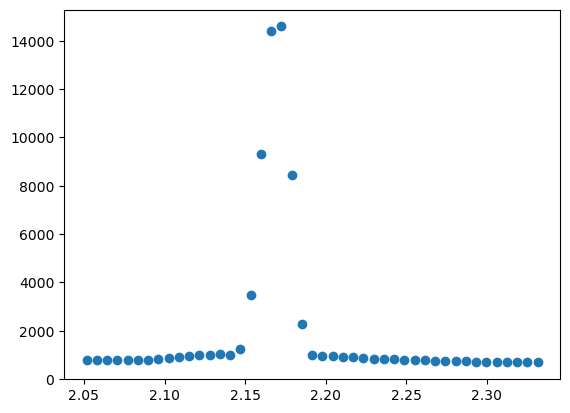

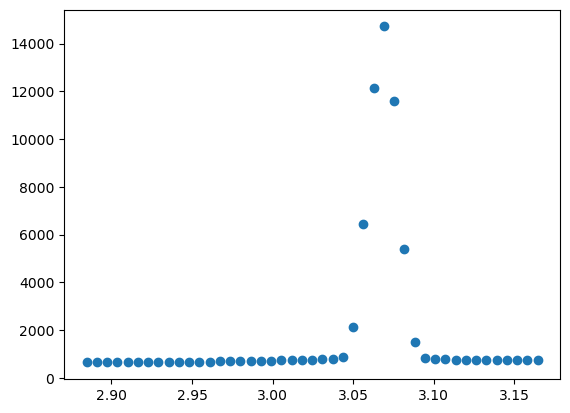

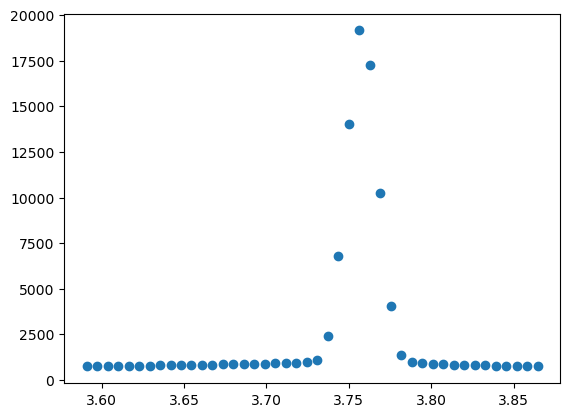

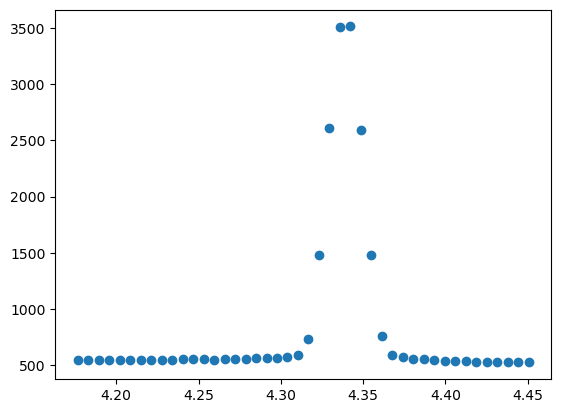

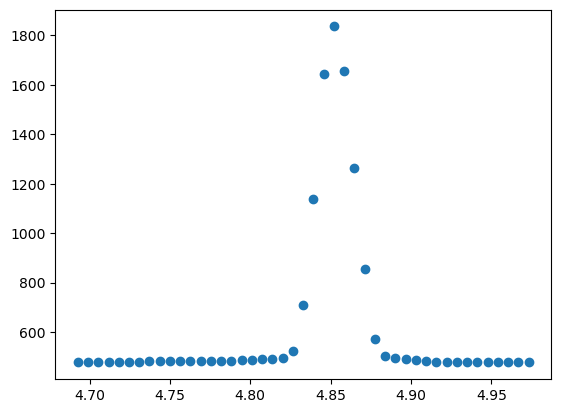

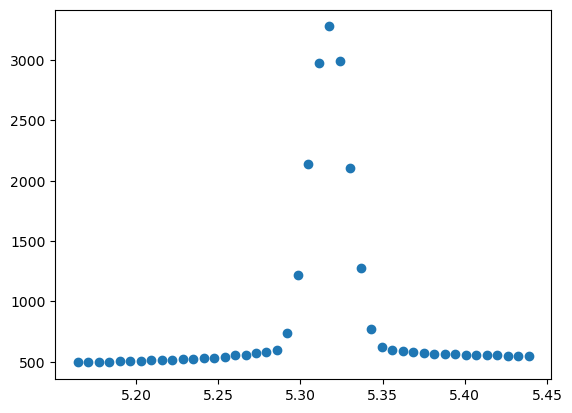

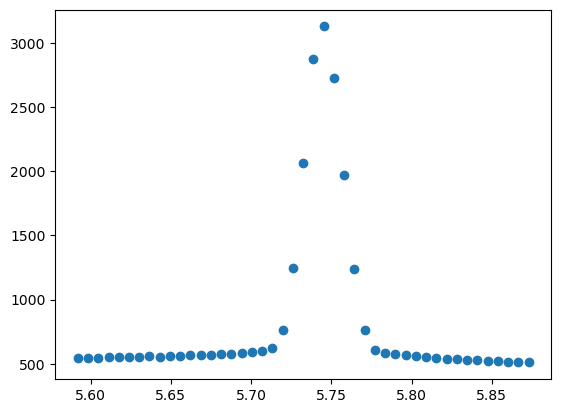

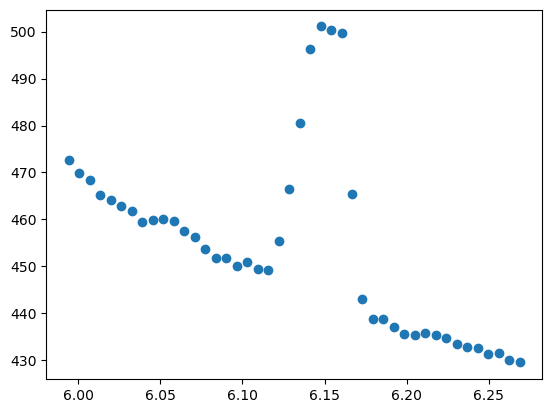

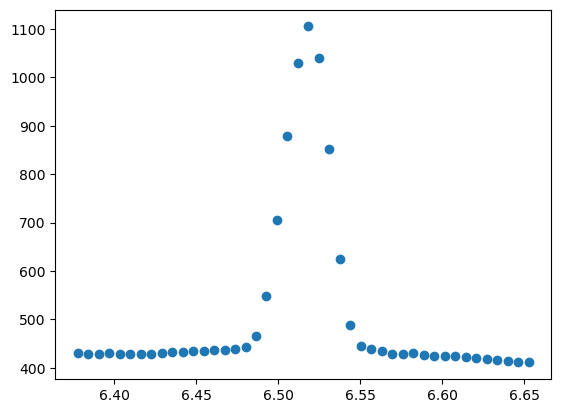

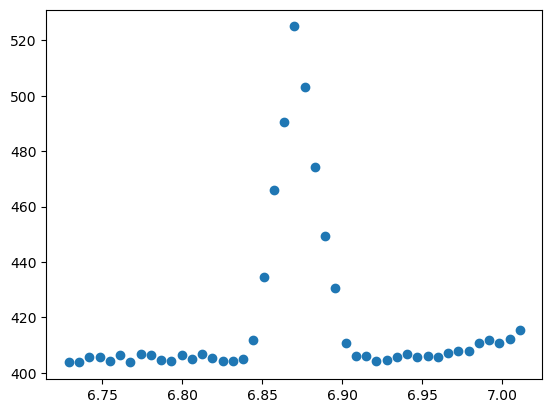

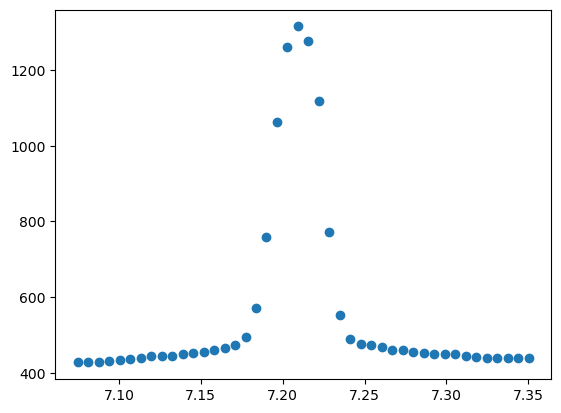

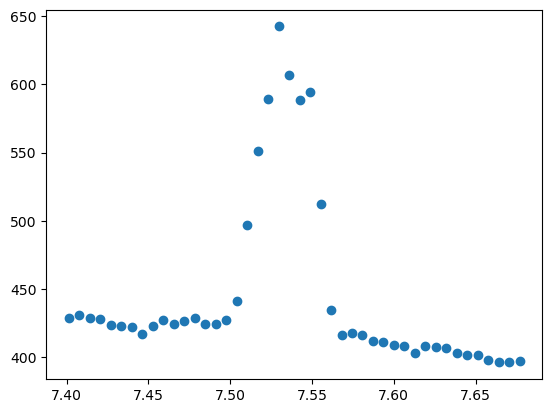

In [288]:
plt.scatter(onetheta_deg1, y_values1st)
plt.show()

plt.scatter(onetheta_deg2, y_values2nd)
plt.show()

plt.scatter(onetheta_deg3, y_values3rd)
plt.show()

plt.scatter(onetheta_deg4, y_values4th)
plt.show()

plt.scatter(onetheta_deg5, y_values5th)
plt.show()

plt.scatter(onetheta_deg6, y_values6th)
plt.show()

plt.scatter(onetheta_deg7, y_values7th)
plt.show()

plt.scatter(onetheta_deg8, y_values8th)
plt.show()

plt.scatter(onetheta_deg9, y_values9th)
plt.show()

plt.scatter(onetheta_deg10, y_values10th)
plt.show()

plt.scatter(onetheta_deg11, y_values11th)
plt.show()

plt.scatter(onetheta_deg12, y_values12th)
plt.show()

In [289]:
#Define Gaussian

def gauss_f(x,A,mu,sig,c):
    return A*np.exp(-(x-mu)**2/sig**2) + c
    
n1, n2, n3, n4, n5, n6, n7 = len(x_values1st), len(x_values2nd), len(x_values3rd), len(x_values4th), len(x_values5th), len(x_values6th), len(x_values7th)
n8, n9, n10, n11, n12 = len(x_values8th), len(x_values9th), len(x_values10th), len(x_values11th), len(x_values12th)
mean1 = (onetheta_deg1*(y_values1st/y_values1st.sum())).sum()
mean2 = (onetheta_deg2*(y_values2nd/y_values2nd.sum())).sum()
mean3 = (onetheta_deg3*(y_values3rd/y_values3rd.sum())).sum()
mean4 = (onetheta_deg4*(y_values4th/y_values4th.sum())).sum()
mean5 = (onetheta_deg5*(y_values5th/y_values5th.sum())).sum()
mean6 = (onetheta_deg6*(y_values6th/y_values6th.sum())).sum()
mean7 = (onetheta_deg7*(y_values7th/y_values7th.sum())).sum()
mean8 = (onetheta_deg8*(y_values8th/y_values8th.sum())).sum()
mean9 = (onetheta_deg9*(y_values9th/y_values9th.sum())).sum()
mean10 = (onetheta_deg10*(y_values10th/y_values10th.sum())).sum()
mean11 = (onetheta_deg11*(y_values11th/y_values11th.sum())).sum()
mean12 = (onetheta_deg12*(y_values12th/y_values12th.sum())).sum()
sigma1 = np.sqrt(((y_values1st/y_values1st.sum())*(onetheta_deg1-mean1)**2).sum())
sigma2 = np.sqrt(((y_values2nd/y_values2nd.sum())*(onetheta_deg2-mean2)**2).sum())
sigma3 = np.sqrt(((y_values3rd/y_values3rd.sum())*(onetheta_deg3-mean3)**2).sum())
sigma4 = np.sqrt(((y_values4th/y_values4th.sum())*(onetheta_deg4-mean4)**2).sum())
sigma5 = np.sqrt(((y_values5th/y_values5th.sum())*(onetheta_deg5-mean5)**2).sum())
sigma6 = np.sqrt(((y_values6th/y_values6th.sum())*(onetheta_deg6-mean6)**2).sum())
sigma7 = np.sqrt(((y_values7th/y_values7th.sum())*(onetheta_deg7-mean7)**2).sum())
sigma8 = np.sqrt(((y_values8th/y_values8th.sum())*(onetheta_deg8-mean8)**2).sum())
sigma9 = np.sqrt(((y_values9th/y_values9th.sum())*(onetheta_deg9-mean9)**2).sum())
sigma10 = np.sqrt(((y_values10th/y_values10th.sum())*(onetheta_deg10-mean10)**2).sum())
sigma11 = np.sqrt(((y_values11th/y_values11th.sum())*(onetheta_deg11-mean11)**2).sum())
sigma12 = np.sqrt(((y_values12th/y_values12th.sum())*(onetheta_deg12-mean12)**2).sum())

amp1, amp2, amp3, amp4, amp5, amp6 = max(y_values1st), max(y_values2nd), max(y_values3rd), max(y_values4th), max(y_values5th), max(y_values6th)
amp7, amp8, amp9, amp10, amp11, amp12 = max(y_values7th), max(y_values8th), max(y_values9th), max(y_values10th), max(y_values11th), max(y_values12th)

popt1, pcov1 = curve_fit(gauss_f, onetheta_deg1, y_values1st, p0=[amp1, mean1, sigma1, 0.1])
popt2, pcov2 = curve_fit(gauss_f, onetheta_deg2, y_values2nd, p0=[amp2, mean2, sigma2, 0.1])
popt3, pcov3 = curve_fit(gauss_f, onetheta_deg3, y_values3rd, p0=[amp3, mean3, sigma3, 0.1])
popt4, pcov4 = curve_fit(gauss_f, onetheta_deg4, y_values4th, p0=[amp4, mean4, sigma4, 0.1])
popt5, pcov5 = curve_fit(gauss_f, onetheta_deg5, y_values5th, p0=[amp5, mean5, sigma5, 0.1])
popt6, pcov6 = curve_fit(gauss_f, onetheta_deg6, y_values6th, p0=[amp6, mean6, sigma6, 0.1])
popt7, pcov7 = curve_fit(gauss_f, onetheta_deg7, y_values7th, p0=[amp7, mean7, sigma7, 0.1])
popt8, pcov8 = curve_fit(gauss_f, onetheta_deg8, y_values8th, p0=[amp8, mean8, sigma8, 0.1])
popt9, pcov9 = curve_fit(gauss_f, onetheta_deg9, y_values9th, p0=[amp9, mean9, sigma9, 0.1])
popt10, pcov10 = curve_fit(gauss_f, onetheta_deg10, y_values10th, p0=[amp10, mean10, sigma10, 0.1])
popt11, pcov11 = curve_fit(gauss_f, onetheta_deg11, y_values11th, p0=[amp11, mean11, sigma11, 0.1])
popt12, pcov12 = curve_fit(gauss_f, onetheta_deg12, y_values12th, p0=[amp12, mean12, sigma12, 0.1])

In [290]:
print(popt1)
print(popt2)
print(popt3)
print(popt4)
print(popt5)
print(popt6)
print(popt7)
print(popt8)
print(popt9)
print(popt10)
print(popt11)
print(popt12)


[1.48754448e+04 2.16885202e+00 1.18004971e-02 8.06307381e+02]
[1.42787066e+04 3.06857958e+00 1.25486144e-02 6.99844833e+02]
[1.86864706e+04 3.75793173e+00 1.33473756e-02 8.31352836e+02]
[3.14986843e+03 4.33902598e+00 1.43443981e-02 5.40792369e+02]
[ 1.37701457e+03  4.85283540e+00 -1.56083278e-02  4.79903801e+02]
[2.80939485e+03 5.31767353e+00 1.65007411e-02 5.38334107e+02]
[2.60059656e+03 5.74486340e+00 1.66418609e-02 5.52120281e+02]
[ 9.70914633e+04  6.06912167e+00 -9.68672130e+00 -9.66261579e+04]
[ 6.87114513e+02  6.51750455e+00 -1.86287910e-02  4.26274534e+02]
[1.09954405e+02 6.87156645e+00 1.75821646e-02 4.06374849e+02]
[ 9.21794005e+02  7.20962062e+00 -1.91101866e-02  4.45096829e+02]
[ 2.21196247e+02  7.53345113e+00 -2.27586138e-02  4.13201974e+02]


In [291]:
A_opt1, mu_opt1, sig_opt1, c1 = popt1
A_opt2, mu_opt2, sig_opt2, c2 = popt2
A_opt3, mu_opt3, sig_opt3, c3 = popt3
A_opt4, mu_opt4, sig_opt4, c4 = popt4
A_opt5, mu_opt5, sig_opt5, c5 = popt5
A_opt6, mu_opt6, sig_opt6, c6 = popt6
A_opt7, mu_opt7, sig_opt7, c7 = popt7
A_opt8, mu_opt8, sig_opt8, c8 = popt8
A_opt9, mu_opt9, sig_opt9, c9 = popt9
A_opt10, mu_opt10, sig_opt10, c10 = popt10
A_opt11, mu_opt11, sig_opt11, c11 = popt11
A_opt12, mu_opt12, sig_opt12, c12 = popt12

In [292]:
#Define the instrumentation contribution
#Instrumentation drift using Cagloti function

U = input("Enter the fitted U value: ")
U = float(U)

V = input("Enter the fitted V value: ")
V = float(V)

W = input("Enter the fitted W value: ")
W = float(W)

mu_opt1rad = math.radians(mu_opt1)
mu_opt2rad = math.radians(mu_opt2)
mu_opt3rad = math.radians(mu_opt3)
mu_opt4rad = math.radians(mu_opt4)
mu_opt5rad = math.radians(mu_opt5)
mu_opt6rad = math.radians(mu_opt6)
mu_opt7rad = math.radians(mu_opt7)
mu_opt8rad = math.radians(mu_opt8)
mu_opt9rad = math.radians(mu_opt9)
mu_opt10rad = math.radians(mu_opt10)
mu_opt11rad = math.radians(mu_opt11)
mu_opt12rad = math.radians(mu_opt12)

def cagloti_f(theta):
    return math.sqrt((U*(math.tan(theta)**2)) + (V*math.tan(theta)) + W)

cagloti1, cagloti2, cagloti3, cagloti4, cagloti5, cagloti6 = cagloti_f(mu_opt1rad), cagloti_f(mu_opt2rad), cagloti_f(mu_opt3rad), cagloti_f(mu_opt4rad), cagloti_f(mu_opt5rad), cagloti_f(mu_opt6rad)
cagloti7, cagloti8, cagloti9, cagloti10, cagloti11, cagloti12 = cagloti_f(mu_opt7rad), cagloti_f(mu_opt8rad), cagloti_f(mu_opt9rad), cagloti_f(mu_opt10rad),cagloti_f(mu_opt11rad), cagloti_f(mu_opt12rad)



Enter the fitted U value: 1
Enter the fitted V value: 1
Enter the fitted W value: 1


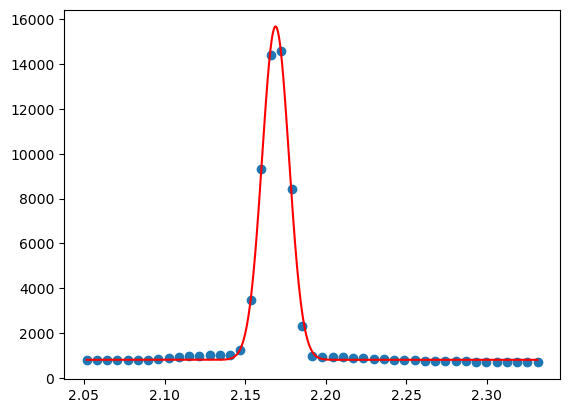

0.027788047170824844
0.02957945974774224
0.02957945974774224
Enter fitted Theta1: 2.17


In [293]:
#1st Peak
x_model1 = np.linspace(min(onetheta_deg1), max(onetheta_deg1), 1000)
y_model1 = gauss_f(x_model1, A_opt1, mu_opt1, sig_opt1, c1)

plt.scatter(onetheta_deg1, y_values1st)
plt.plot(x_model1, y_model1, color='r')
plt.show()

#FWHM = 2*sqrt(2ln2)*standard deviation
FWHM1 = (2*math.sqrt(2*math.log(2)))*sig_opt1
print(FWHM1)

#Beta1 = 0.5*H(pi/loge2)^1/2, where H = FWHM
Beta_tot1 = 0.5*FWHM1*(math.pi/math.log(2, math.e))**(1/2)
print(Beta_tot1)

Beta_samp1 = Beta_tot1
print(Beta_samp1)

peak_thet1 = input("Enter fitted Theta1: ")
peak_thet1 = float(peak_thet1)

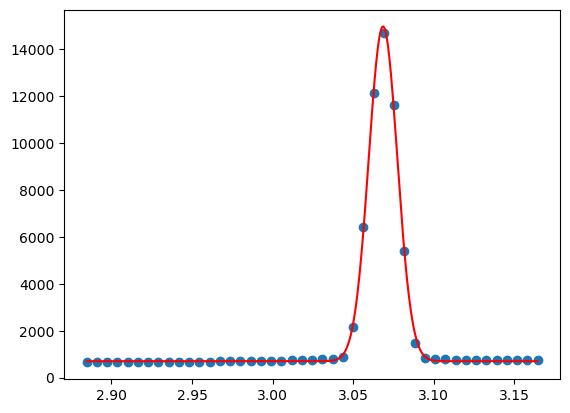

0.029549728718148743
0.0314547116536091
0.0314547116536091
Enter fitted Theta2: 3.07


In [294]:
#2nd Peak
x_model2 = np.linspace(min(onetheta_deg2), max(onetheta_deg2), 1000)
y_model2 = gauss_f(x_model2, A_opt2, mu_opt2, sig_opt2, c2)

plt.scatter(onetheta_deg2, y_values2nd)
plt.plot(x_model2, y_model2, color='r')
plt.show()

#FWHM = 2*sqrt(2ln2)*standard deviation
FWHM2 = (2*math.sqrt(2*math.log(2)))*sig_opt2
print(FWHM2)

#Beta1 = 0.5*H(pi/loge2)^1/2, where H = FWHM
Beta_tot2 = 0.5*FWHM2*(math.pi/math.log(2, math.e))**(1/2)
print(Beta_tot2)

Beta_samp2 = Beta_tot2
print(Beta_samp2)

peak_thet2 = input("Enter fitted Theta2: ")
peak_thet2 = float(peak_thet2)

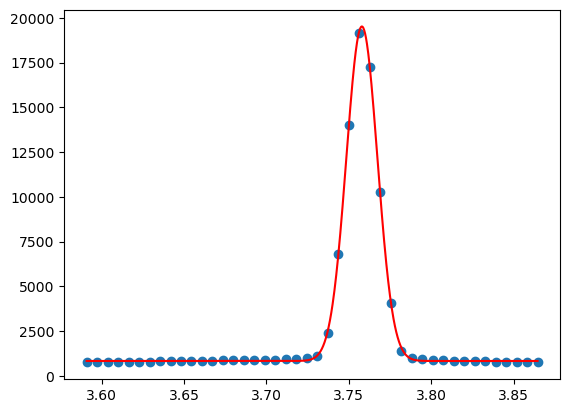

0.03143066772279254
0.02957945974774224
0.03345690918961422
Enter fitted Theta3: 3.77


In [295]:
#3rd Peak
x_model3 = np.linspace(min(onetheta_deg3), max(onetheta_deg3), 1000)
y_model3 = gauss_f(x_model3, A_opt3, mu_opt3, sig_opt3, c3)

plt.scatter(onetheta_deg3, y_values3rd)
plt.plot(x_model3, y_model3, color='r')
plt.show()

#FWHM = 2*sqrt(2ln2)*standard deviation
FWHM3 = (2*math.sqrt(2*math.log(2)))*sig_opt3
print(FWHM3)

#Beta1 = 0.5*H(pi/loge2)^1/2, where H = FWHM
Beta_tot3 = 0.5*FWHM3*(math.pi/math.log(2, math.e))**(1/2)
print(Beta_tot1)

Beta_samp3 = Beta_tot3
print(Beta_samp3)

peak_thet3 = input("Enter fitted Theta3: ")
peak_thet3 = float(peak_thet3)

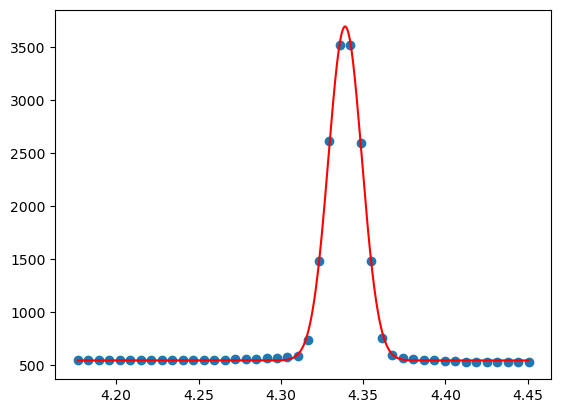

0.033778476087910604
0.03595607376222715
0.03595607376222715
Enter fitted Theta4: 4.34


In [296]:
#4th Peak
x_model4 = np.linspace(min(onetheta_deg4), max(onetheta_deg4), 1000)
y_model4 = gauss_f(x_model4, A_opt4, mu_opt4, sig_opt4, c4)

plt.scatter(onetheta_deg4, y_values4th)
plt.plot(x_model4, y_model4, color='r')
plt.show()

#FWHM = 2*sqrt(2ln2)*standard deviation
FWHM4 = (2*math.sqrt(2*math.log(2)))*sig_opt4
print(FWHM4)

#Beta1 = 0.5*H(pi/loge2)^1/2, where H = FWHM
Beta_tot4 = 0.5*FWHM4*(math.pi/math.log(2, math.e))**(1/2)
print(Beta_tot4)

Beta_samp4 = Beta_tot4
print(Beta_samp4)

peak_thet4 = input("Enter fitted Theta4: ")
peak_thet4 = float(peak_thet4)

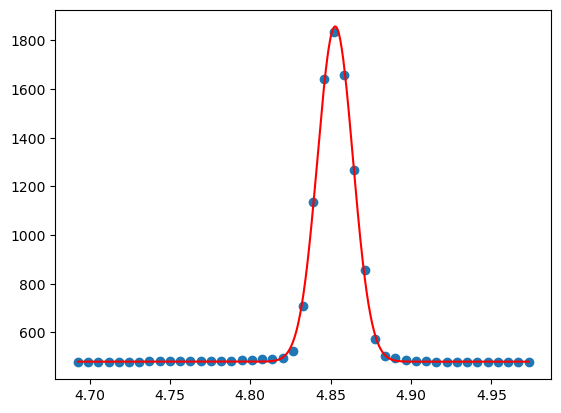

-0.036754803186328205
0.03595607376222715
0.03595607376222715
Enter fitted Theta5: 4.85


In [297]:
#5th Peak
x_model5 = np.linspace(min(onetheta_deg5), max(onetheta_deg5), 1000)
y_model5 = gauss_f(x_model5, A_opt5, mu_opt5, sig_opt5, c5)

plt.scatter(onetheta_deg5, y_values5th)
plt.plot(x_model5, y_model5, color='r')
plt.show()

#FWHM = 2*sqrt(2ln2)*standard deviation
FWHM5 = (2*math.sqrt(2*math.log(2)))*sig_opt5
print(FWHM5)

#Beta1 = 0.5*H(pi/loge2)^1/2, where H = FWHM
Beta_tot5 = 0.5*FWHM4*(math.pi/math.log(2, math.e))**(1/2)
print(Beta_tot5)

Beta_samp5 = Beta_tot5
print(Beta_samp5)

peak_thet5 = input("Enter fitted Theta5: ")
peak_thet5 = float(peak_thet5)

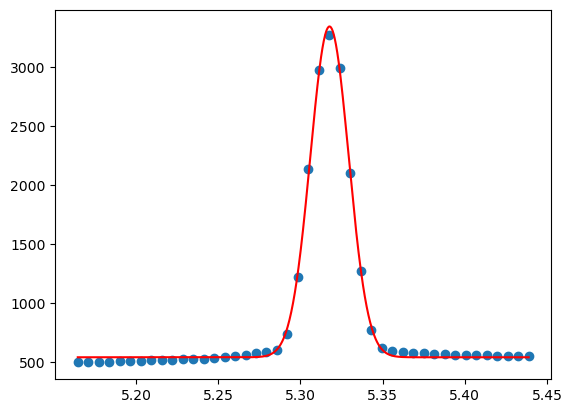

0.0388562758252979
0.04136122411395247
0.04136122411395247
Enter fitted Theta6: 5.32


In [298]:
#6th Peak
x_model6 = np.linspace(min(onetheta_deg6), max(onetheta_deg6), 1000)
y_model6 = gauss_f(x_model6, A_opt6, mu_opt6, sig_opt6, c6)

plt.scatter(onetheta_deg6, y_values6th)
plt.plot(x_model6, y_model6, color='r')
plt.show()

#FWHM = 2*sqrt(2ln2)*standard deviation
FWHM6 = (2*math.sqrt(2*math.log(2)))*sig_opt6
print(FWHM6)

#Beta1 = 0.5*H(pi/loge2)^1/2, where H = FWHM
Beta_tot6 = 0.5*FWHM6*(math.pi/math.log(2, math.e))**(1/2)
print(Beta_tot6)

Beta_samp6 = Beta_tot6
print(Beta_samp6)

peak_thet6 = input("Enter fitted Theta6: ")
peak_thet6 = float(peak_thet6)

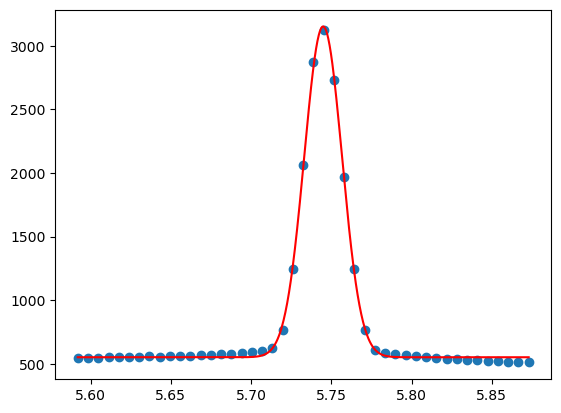

0.03918858756213425
0.04171495899798467
0.04171495899798467
Enter fitted Theta7: 5.75


In [299]:
#7th Peak
x_model7 = np.linspace(min(onetheta_deg7), max(onetheta_deg7), 1000)
y_model7 = gauss_f(x_model7, A_opt7, mu_opt7, sig_opt7, c7)

plt.scatter(onetheta_deg7, y_values7th)
plt.plot(x_model7, y_model7, color='r')
plt.show()

#FWHM = 2*sqrt(2ln2)*standard deviation
FWHM7 = (2*math.sqrt(2*math.log(2)))*sig_opt7
print(FWHM7)

#Beta1 = 0.5*H(pi/loge2)^1/2, where H = FWHM
Beta_tot7 = 0.5*FWHM7*(math.pi/math.log(2, math.e))**(1/2)
print(Beta_tot7)

Beta_samp7 = Beta_tot7
print(Beta_samp7)

peak_thet7 = input("Enter fitted Theta7: ")
peak_thet7 = float(peak_thet7)

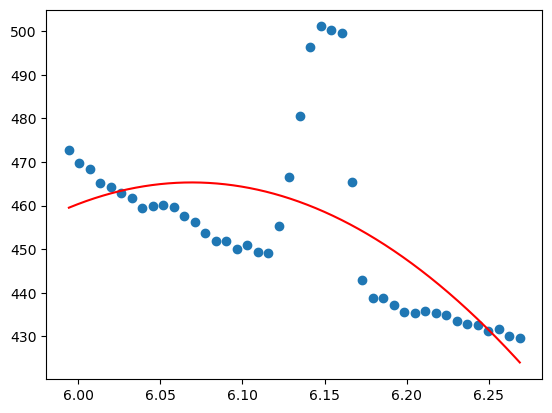

-22.81048548733773
-24.281009498485634
-24.281009498485634


In [ ]:
#8th Peak
x_model8 = np.linspace(min(onetheta_deg8), max(onetheta_deg8), 1000)
y_model8 = gauss_f(x_model8, A_opt8, mu_opt8, sig_opt8, c8)

plt.scatter(onetheta_deg8, y_values8th)
plt.plot(x_model8, y_model8, color='r')
plt.show()

#FWHM = 2*sqrt(2ln2)*standard deviation
FWHM8 = (2*math.sqrt(2*math.log(2)))*sig_opt8
print(FWHM8)

#Beta1 = 0.5*H(pi/loge2)^1/2, where H = FWHM
Beta_tot8 = 0.5*FWHM8*(math.pi/math.log(2, math.e))**(1/2)
print(Beta_tot8)

Beta_samp8 = Beta_tot8
print(Beta_samp8)

peak_thet8 = input("Enter fitted Theta8: ")
peak_thet8 = float(peak_thet8)

In [ ]:
#9th Peak
x_model9 = np.linspace(min(onetheta_deg9), max(onetheta_deg9), 1000)
y_model9 = gauss_f(x_model9, A_opt9, mu_opt9, sig_opt9, c9)

plt.scatter(onetheta_deg9, y_values9th)
plt.plot(x_model9, y_model9, color='r')
plt.show()

#FWHM = 2*sqrt(2ln2)*standard deviation
FWHM9 = (2*math.sqrt(2*math.log(2)))*sig_opt9
print(FWHM9)

#Beta1 = 0.5*H(pi/loge2)^1/2, where H = FWHM
Beta_tot9 = 0.5*FWHM9*(math.pi/math.log(2, math.e))**(1/2)
print(Beta_tot9)

Beta_samp9 = Beta_tot9
print(Beta_samp9)

peak_thet9 = input("Enter fitted Theta9: ")
peak_thet9 = float(peak_thet9)

In [ ]:
#10th Peak
x_model10 = np.linspace(min(onetheta_deg10), max(onetheta_deg10), 1000)
y_model10 = gauss_f(x_model10, A_opt10, mu_opt10, sig_opt10, c10)

plt.scatter(onetheta_deg10, y_values10th)
plt.plot(x_model10, y_model10, color='r')
plt.show()

#FWHM = 2*sqrt(2ln2)*standard deviation
FWHM10 = (2*math.sqrt(2*math.log(2)))*sig_opt10
print(FWHM10)

#Beta1 = 0.5*H(pi/loge2)^1/2, where H = FWHM
Beta_tot10 = 0.5*FWHM10*(math.pi/math.log(2, math.e))**(1/2)
print(Beta_tot10)

Beta_samp10 = Beta_tot10
print(Beta_samp10)


peak_thet10 = input("Enter fitted Theta10: ")
peak_thet10 = float(peak_thet10)

In [ ]:
#11th Peak
x_model11 = np.linspace(min(onetheta_deg11), max(onetheta_deg11), 1000)
y_model11 = gauss_f(x_model11, A_opt11, mu_opt11, sig_opt11, c11)

plt.scatter(onetheta_deg11, y_values11th)
plt.plot(x_model11, y_model11, color='r')
plt.show()

#FWHM = 2*sqrt(2ln2)*standard deviation
FWHM11 = (2*math.sqrt(2*math.log(2)))*sig_opt11
print(FWHM11)

#Beta1 = 0.5*H(pi/loge2)^1/2, where H = FWHM
Beta_tot11 = 0.5*FWHM11*(math.pi/math.log(2, math.e))**(1/2)
print(Beta_tot11)

Beta_samp11 = Beta_tot11
print(Beta_samp11)


peak_thet11 = input("Enter fitted Theta11: ")
peak_thet11 = float(peak_thet11)

In [ ]:
#12th Peak
x_model12 = np.linspace(min(onetheta_deg12), max(onetheta_deg12), 1000)
y_model12 = gauss_f(x_model12, A_opt12, mu_opt12, sig_opt12, c12)

plt.scatter(onetheta_deg12, y_values12th)
plt.plot(x_model12, y_model12, color='r')
plt.show()

#FWHM = 2*sqrt(2ln2)*standard deviation
FWHM12 = (2*math.sqrt(2*math.log(2)))*sig_opt12
print(FWHM12)

#Beta1 = 0.5*H(pi/loge2)^1/2, where H = FWHM
Beta_tot12 = 0.5*FWHM12*(math.pi/math.log(2, math.e))**(1/2)
print(Beta_tot12)

Beta_samp12 = Beta_tot12
print(Beta_samp12)

peak_thet12 = input("Enter fitted Theta12: ")
peak_thet12 = float(peak_thet12)

In [ ]:
#Collecting Beta Sample Values
beta_array = [Beta_samp1, Beta_samp2, Beta_samp3, Beta_samp4, Beta_samp5, Beta_samp6, Beta_samp7, Beta_samp8, Beta_samp9, Beta_samp10, Beta_samp11, Beta_samp12]
beta_array = np.abs(beta_array)
print(beta_array)

#Collecting Theta Values
theta_array = [peak_thet1, peak_thet2, peak_thet3, peak_thet4, peak_thet5, peak_thet6, peak_thet7, peak_thet8, peak_thet9, peak_thet10, peak_thet11, peak_thet12]
print(theta_array)

In [ ]:
#WilliamsonHallPlot
sintheta_array = np.sin(np.radians(theta_array))
print(sintheta_array)

costheta_array = np.cos(np.radians(theta_array))
print(costheta_array)

betacostheta = np.multiply(beta_array, costheta_array)
print(betacostheta)

fit = np.polyfit(sintheta_array, betacostheta, 1)

fit_fn = np.poly1d(fit)

plt.plot(sintheta_array, betacostheta, 'o', label='Original Data')
plt.plot(sintheta_array, fit_fn(sintheta_array), '--k', label='Line of Best Fit')
plt.legend()
plt.show()



In [ ]:
#Save array values
sintheta_array_out = input("Enter the name for saved sin theta values: ")
betacostheta_array_out = input("Enter the name for save beta cos theta values: ")

np.savetxt(sintheta_array_out, sintheta_array)
np.savetxt(betacostheta_array_out, betacostheta)


In [ ]:
#Williamson Hall - No Background 